## Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import pickle
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

ModuleNotFoundError: No module named 'matplotlib'

## Reading the dataset

In [ ]:
df = pd.read_csv("../Bengaluru_House_Data.csv")
# gurugram_real_estate_data = pd.read_csv("./Gurugram_Real_Estate_Data.csv", encoding='ISO-8859-1')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


## Data Cleaning

In [ ]:
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [ ]:
df1 = df.drop(['area_type', 'availability', 'society'], axis = 1)
df1.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


In [ ]:
df1.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df2 = df1.dropna()

In [ ]:
df2.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df2.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
10,Whitefield,3 BHK,1800,2.0,2.0,70.00
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00
12,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00


In [ ]:
df2.shape

(12710, 6)

In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:
df2['no_of_bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2 = df2.drop(['size'], axis = 1)
df2.head(10)

<ipython-input-81-bf24026be1f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['no_of_bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,total_sqft,bath,balcony,price,no_of_bedroom
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
5,Whitefield,1170,2.0,1.0,38.00,2
8,Marathahalli,1310,3.0,1.0,63.25,3
10,Whitefield,1800,2.0,2.0,70.00,3
11,Whitefield,2785,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000,2.0,1.0,38.00,2


In [ ]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df2[~df2['total_sqft'].apply(isFloat)].head(10)

,location,total_sqft,bath,balcony,price,no_of_bedroom
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


In [ ]:
def convert_sqft_to_float(x):
    range_of_sqft = x.split(' - ')
    if len(range_of_sqft) == 2:
        return (float(range_of_sqft[0]) + float(range_of_sqft[1])) / 2
    try:
        return float(x)
    except:
        return None

In [ ]:
df3 = df2.copy()
df3['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_float)
df3.head(10)

,location,total_sqft,bath,balcony,price,no_of_bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2


In [ ]:
df3.loc[30]

,30
location,Yelahanka
total_sqft,2475.0
bath,4.0
balcony,0.0
price,186.0
no_of_bedroom,4


In [ ]:
df3.loc[410]

,410
location,Kengeri
total_sqft,NaN
bath,1.0
balcony,0.0
price,18.5
no_of_bedroom,1


## Feature Engineering

In [ ]:
df4 = df3.copy()
df4['price_per_sqft'] = round(df4['price'] * 100000 / df4['total_sqft'], 2)
df4.head(10)

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.86
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.24
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.89
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.46
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.00


In [ ]:
len(df4.location.unique())

1265

In [ ]:
df4.location = df4.location.apply(lambda x: x.strip())

location_info = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_info

,location
location,
Whitefield,515
Sarjapur Road,372
Electronic City,302
Kanakpura Road,261
Thanisandra,234
...,...
Kanakapura Rod,1
Kanakapura Main Road,1
Kanakapura Road,1


In [ ]:
location_info[location_info <= 10]

,location
location,
1st Block Koramangala,10
Kalkere,10
Basapura,10
Kodigehalli,10
Gunjur Palya,10
...,...
Kanakapura Rod,1
Kanakapura Main Road,1
Kanakapura Road,1


In [ ]:
len(location_info[location_info <= 10])

1017

In [ ]:
location_count_less_than_10 = location_info[location_info <= 10]

In [ ]:
len(df4.location.unique())

1254

In [ ]:
df4.location = df4.location.apply(lambda x: 'Other' if x in location_count_less_than_10 else x)
len(df4.location.unique())

238

In [ ]:
df4[df4.location == 'Other'].head(10)

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
18,Other,2770.0,4.0,2.0,290.0,3,10469.31
19,Other,1100.0,2.0,2.0,48.0,2,4363.64
25,Other,1250.0,3.0,2.0,56.0,3,4480.00
42,Other,600.0,1.0,0.0,38.0,1,6333.33
49,Other,869.0,2.0,1.0,36.0,2,4142.69
50,Other,1270.0,2.0,1.0,50.0,2,3937.01
57,Other,1500.0,2.0,2.0,185.0,2,12333.33
59,Other,840.0,2.0,2.0,45.0,2,5357.14
60,Other,4395.0,3.0,2.0,240.0,3,5460.75
61,Other,845.0,2.0,1.0,55.0,2,6508.88


In [ ]:
df4.head(10)

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.86
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.24
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.89
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.46
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.00


## Outlier Detection

In [ ]:
df4[(df4.total_sqft/df4['no_of_bedroom']) < 300].head()

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.30
70,Other,500.0,3.0,2.0,100.0,3,20000.00
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.61
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.21


In [ ]:
df4[(df4.total_sqft/df4['no_of_bedroom']) < 300].shape

(655, 7)

In [ ]:
df5 = df4[~((df4.total_sqft/df4['no_of_bedroom']) < 300)]
df5.head(10)

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.86
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.24
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.89
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.46
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.00


In [ ]:
df5.shape

(12055, 7)

In [ ]:
df5.price_per_sqft.describe()

,price_per_sqft
count,12013.000000
mean,6206.082361
std,3985.518849
min,267.830000
25%,4199.360000
50%,5252.530000
75%,6823.530000
max,176470.590000


In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft > (m - st)) & (sub_df.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df4)
df6.shape

(10817, 7)

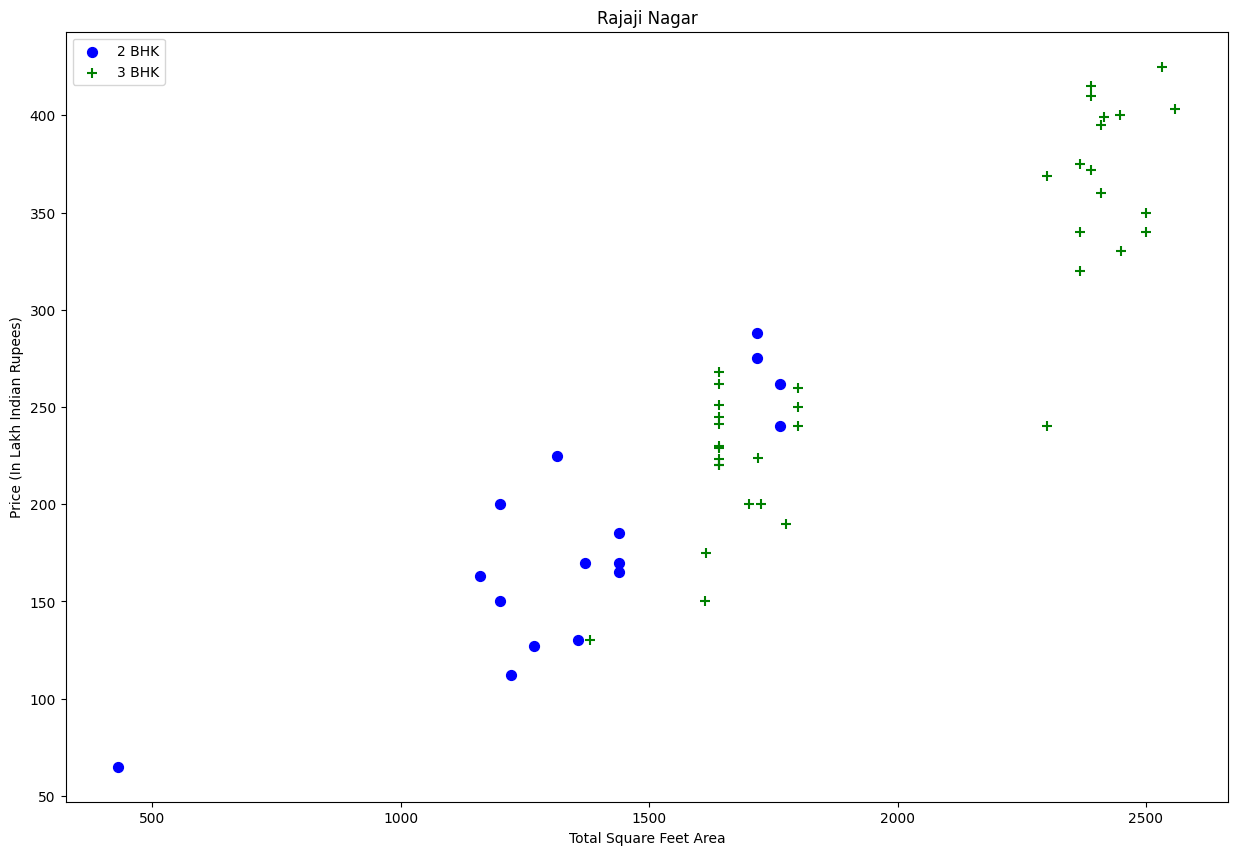

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.no_of_bedroom==2)]
    bhk3 = df[(df.location==location) & (df.no_of_bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (In Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('no_of_bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('no_of_bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7552, 7)

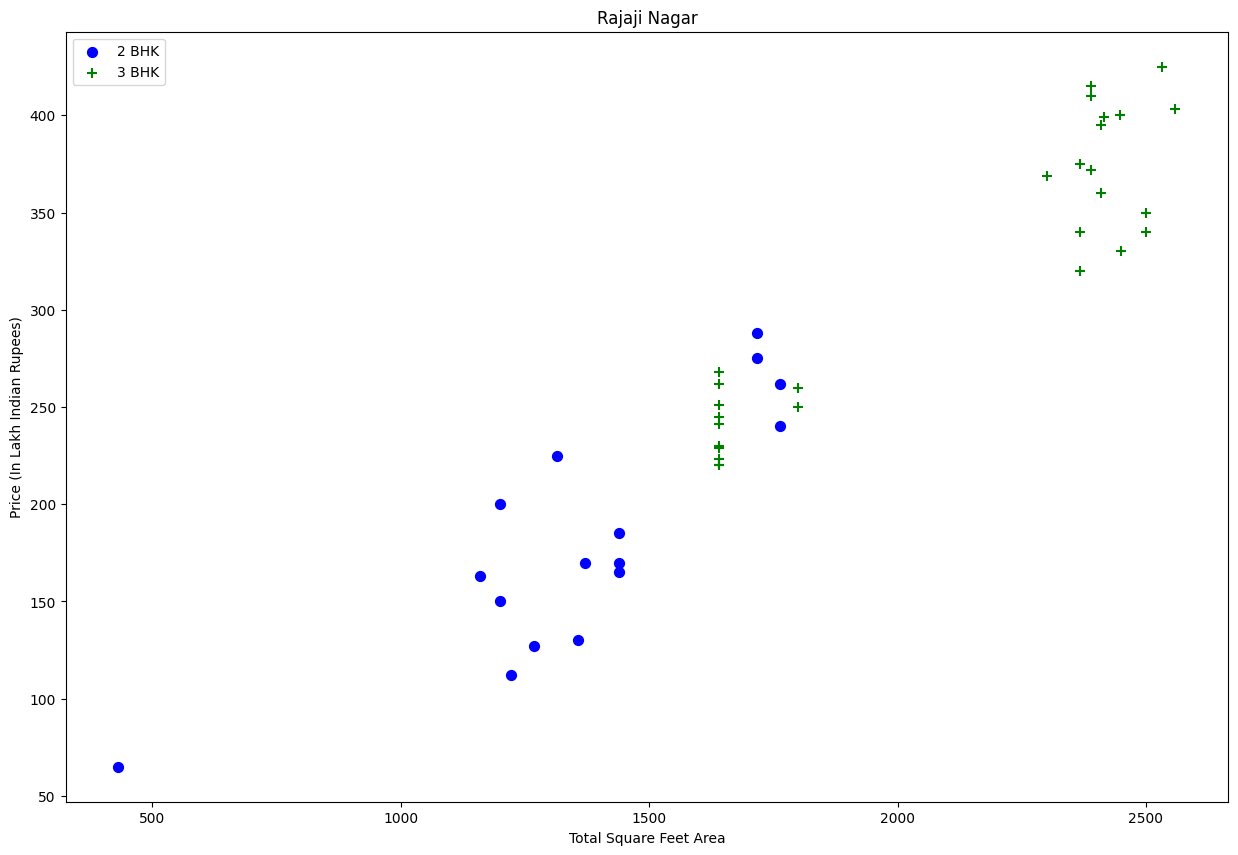

In [ ]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

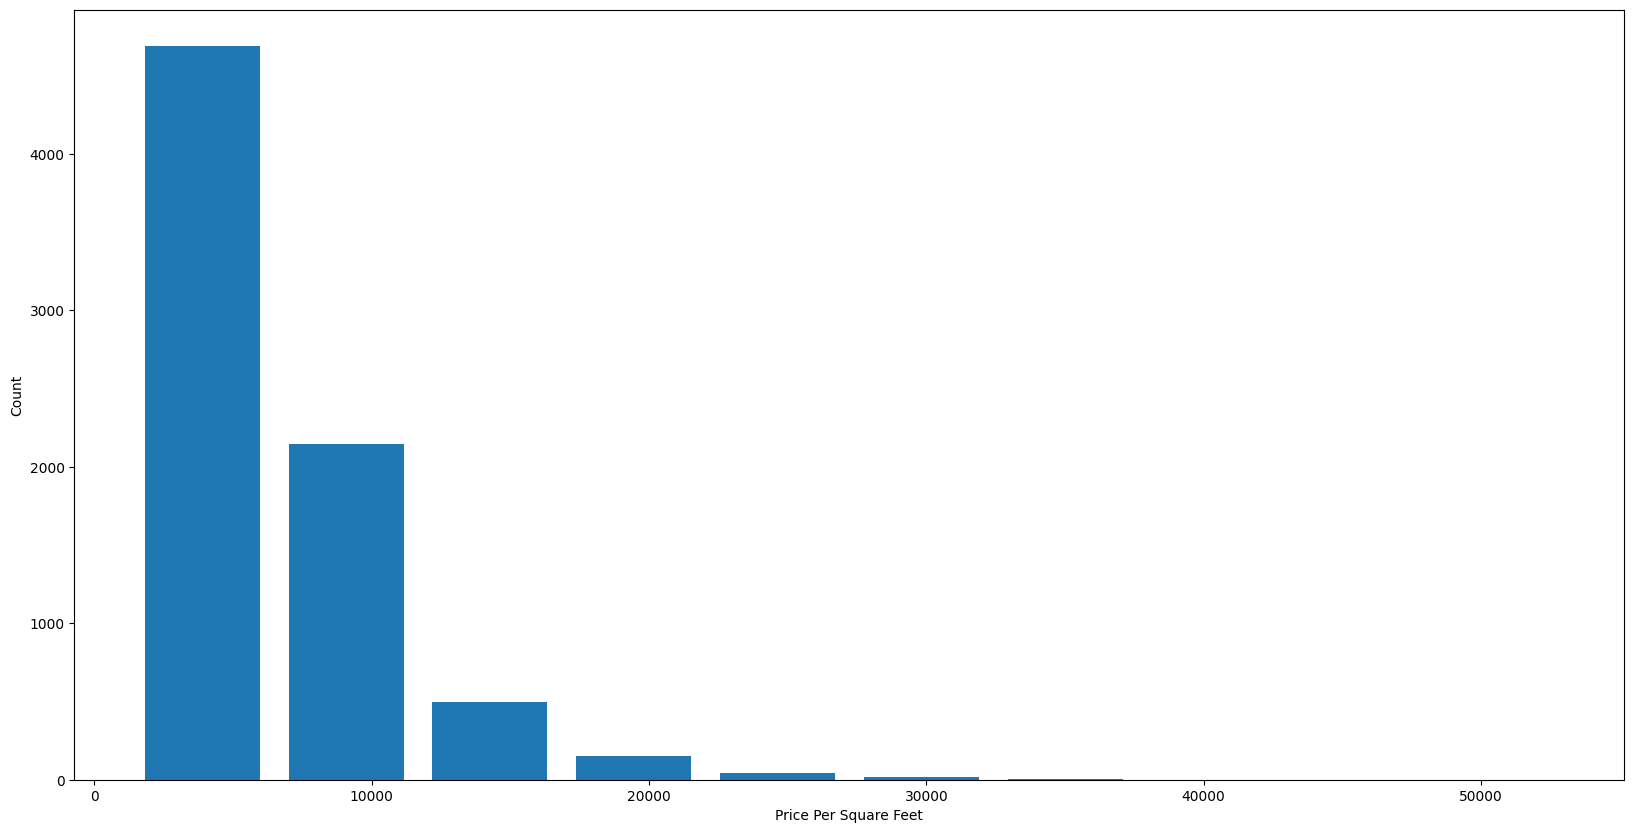

In [ ]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df7.bath.unique()

array([ 4.,  3.,  6.,  2.,  1.,  5.,  8.,  7.,  9., 10., 27., 11., 15.,
       13.])

Text(0, 0.5, 'Count')

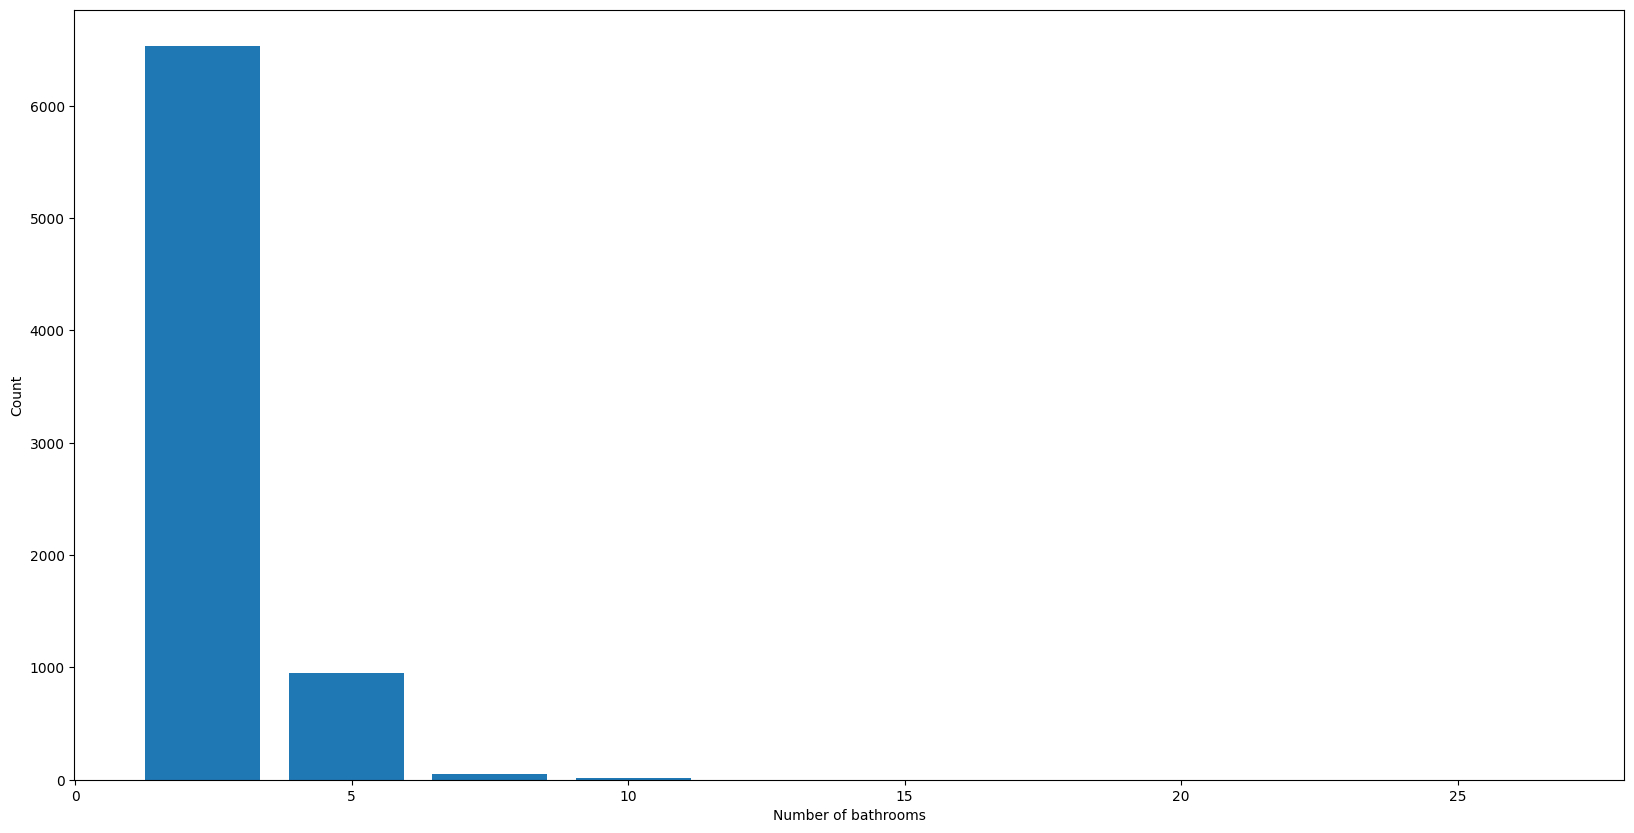

In [ ]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df7[df7.bath > 10]

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
5784,Other,8000.0,27.0,0.0,230.0,27,2875.00
5793,Other,1200.0,11.0,0.0,170.0,11,14166.67
6433,Other,1250.0,15.0,0.0,125.0,14,10000.00
7440,Other,5425.0,13.0,0.0,275.0,13,5069.12


In [ ]:
df7[df7.bath > df7.no_of_bedroom + 2]

,location,total_sqft,bath,balcony,price,no_of_bedroom,price_per_sqft
1521,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.33
1655,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.03
7449,Other,2400.0,6.0,2.0,775.0,3,32291.67
9513,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.03


In [ ]:
df8 = df7[df7.bath < df7.no_of_bedroom + 2]
df8.shape

(7469, 7)

In [ ]:
df8 = df8.drop(['price_per_sqft'], axis = 'columns')
df8.shape

(7469, 6)

## One-hot encoding for Location

In [ ]:
dummies_df = pd.get_dummies(df8.location)
dummies_df.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df9 = pd.concat([df8,dummies_df.drop('Other',axis='columns')],axis='columns')
df9.head()

,location,total_sqft,bath,balcony,price,no_of_bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df10 = df9.drop('location',axis='columns')
df10.head()

,total_sqft,bath,balcony,price,no_of_bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,6.0,2.0,125.0,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,930.0,4.0,2.0,85.0,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Building a Model

In [ ]:
df10.shape

(7469, 242)

In [ ]:
X = df10.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,no_of_bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,6.0,2.0,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,930.0,4.0,2.0,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.shape

(7469, 241)

In [ ]:
y = df10.price
y.head()

,price
0,428.0
1,194.0
2,125.0
3,235.0
4,85.0


In [ ]:
len(y)

7469

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6714772400846178

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.63345952, 0.72892533, 0.66985427, 0.74137883, 0.68933137])

## Using GridSearchCV

In [ ]:
def model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', Lasso())
            ]),
            'params': {
                'regressor__alpha': [1, 2],
                'regressor__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.692590,{'regressor__fit_intercept': True}
1,lasso,0.653573,"{'regressor__alpha': 1, 'regressor__selection'..."
2,decision_tree,0.461429,"{'criterion': 'squared_error', 'splitter': 'ra..."


## Using Linear Regression as the model

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
print(f"{round(predict_price('Whitefield', 1500, 3, 3), 2)} Lakhs")

92.05 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f"{round(predict_price('Indira Nagar', 2000, 4, 4), 2)} Lakhs")

250.04 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Export the tested model to a pickle file

In [ ]:
with open('bengaluru_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Exporting location and column information to a file

In [ ]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))